<a href="https://colab.research.google.com/github/Abhishek3102/OpenCV/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/jasmcaus/opencv-course.git

fatal: destination path 'opencv-course' already exists and is not an empty directory.


In [3]:
pip install opencv-contrib-python

In [4]:
pip install caer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 42.6 MB/s eta 0:00:00


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [6]:
img = cv.imread('/content/opencv-course/Resources/Photos/cat.jpg')

# RESCALE FRAME FUNCTION WORKS FOR IMAGES, VIDEOS AS WELL AS LIVE VIDEOS
def rescaleFrame(frame, scale=0.75):
  width = int(frame.shape[1] * scale)
  height = int(frame.shape[0] * scale)
  dimensions = (width, height)
  return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

cv.waitKey(0)

-1

**RESIZED IMAGE**

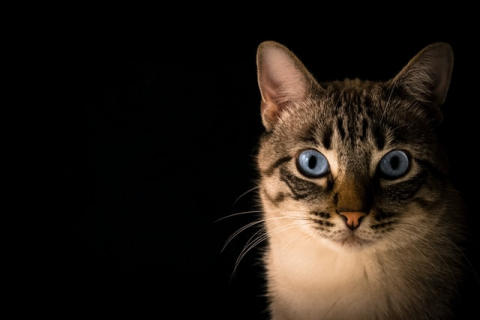

In [ ]:
resized_img = rescaleFrame(img)
cv2_imshow(resized_img)

**ORIGINAL IMAGE**

In [ ]:
cv2_imshow(img)

In [ ]:
# capture = cv.VideoCapture('/content/opencv-course/Resources/Videos/dog.mp4')
# while True:
#   isTrue, Video = capture.read()
#   cv2_imshow(Video)

#   if cv.waitKey(20) & 0xFF == ord('d'):
#     break

# capture.release()
# cv.destroyAllWindows()

In [ ]:
capture = cv.VideoCapture('/content/opencv-course/Resources/Videos/dog.mp4')

while True:
    isTrue, Video = capture.read()

    if not isTrue:
        break

    cv2_imshow(Video)
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

capture.release()
cv.destroyAllWindows()


In [ ]:
from IPython.display import HTML
import io
import base64

def show_video(file_path):
    video = io.open(file_path, 'r+b').read()
    encoded = base64.b64encode(video).decode('utf-8')
    return HTML(data=f'''
        <video width="320" height="240" controls>
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
        </video>''')


In [ ]:
show_video('/content/opencv-course/Resources/Videos/dog.mp4')

In [ ]:
resized_video = rescaleFrame(show_video)

In [ ]:
import cv2 as cv
import numpy as np

blank = np.zeros((500,500,3), dtype='uint8')
cv2_imshow(blank)

# blank[200:300, 300:400] = 0,0,255
# cv2_imshow(blank)

# Draw a rectangle
cv.rectangle(blank, (0,0), (250,250), (0,255,0), thickness = cv.FILLED)
cv2_imshow(blank)

In [ ]:
# Draw a circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255),
          thickness = 3)
cv2_imshow(blank)

In [ ]:
# In thickness, we can give a random number. -1 and filled can also be given.
# -1 and FILLED will fill the entire shape with that colour
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255),
          thickness = -1)
cv2_imshow(blank)

In [ ]:
cv.line(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (255,255,255),
        thickness = 3)
cv2_imshow(blank)

In [ ]:
# putText(img,text,org,fontFace,fontScale,color,thickness,linetype,bottomLeftOrigin)

blank1 = np.zeros((500, 500, 3), dtype=np.uint8)

cv.putText(blank1,"Hello, i am Abhishek", (50,300), cv.FONT_HERSHEY_TRIPLEX,1.0,
           (69,137,218), 2)
cv2_imshow(blank1)
cv.waitKey(0)

**CONVERTING IMAGE TO GRAYSCALE**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/opencv-course/Resources/Photos/cat.jpg")
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


**BLURRING THE IMAGE**

In [ ]:
photo_before_blur = cv.imread("/content/opencv-course/Resources/Photos/group 2.jpg")
# RESCALE FRAME FUNCTION WORKS FOR IMAGES, VIDEOS AS WELL AS LIVE VIDEOS
def rescaleFrame(frame, scale=0.55):
  width = int(frame.shape[1] * scale)
  height = int(frame.shape[0] * scale)
  dimensions = (width, height)
  return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

cv.waitKey(0)

resized_img = rescaleFrame(photo_before_blur)
cv2_imshow(resized_img)

photo_after_blur = cv.GaussianBlur(photo_before_blur, (7,7), cv.BORDER_DEFAULT)
resized_img = rescaleFrame(photo_after_blur)
cv2_imshow(resized_img)

### "Edge cascade" likely refers to a method or technique used in computer vision for detecting edges in images. Edge detection is a fundamental step in image processing and computer vision, often used as a pre-processing step for tasks such as object detection, image segmentation, and feature extraction.

In [ ]:
# Edge Cascade
canny = cv.Canny(photo_before_blur, 125, 175)
cv2_imshow(canny)

In [ ]:
# To reduce the number of edges, blur the image
canny = cv.Canny(photo_after_blur, 125, 175)
cv2_imshow(canny)

In [ ]:
# Dilating the image - operation in image processing that is used to enhance or emphasize regions of the image that
# are brighter than their surroundings.

dilated = cv.dilate(canny, (7,7), iterations = 3)
cv2_imshow(dilated)


In [ ]:
# RESIZING THE IMAGE
resized = cv.resize(photo_after_blur, (300,300), interpolation=cv.INTER_CUBIC)
cv2_imshow(resized)

In [ ]:
# CROPPING THE IMAGE
cropped = photo_after_blur[350:450, 450:500]
cv2_imshow(cropped)

**TRANSLATING THE IMAGE**

In [ ]:
# Translation - Shifting the image along x and y axis
import numpy as np
def translate(img, x, y):
  transMat = np.float32([[1,0,x], [0,1,y]])
  dimensions = (img.shape[1], img.shape[0])
  return cv.warpAffine(img, transMat, dimensions)

# x --> right, y --> down, -x --> left, -y --> up
translated = translate(img, 100, 100)
cv2_imshow(translated)

In [ ]:
translated = translate(img, -100, -100)
cv2_imshow(translated)

**ROTATING THE IMAGE**

In [ ]:
def rotate(img, angle, rotPoint = None):
  (height, width) = img.shape[:2]

  if rotPoint is None:
    rotPoint = (width // 2, height // 2)

  rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
  dimensions = (width, height)

  return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 45)
cv2_imshow(rotated)

cv.waitKey(0)

In [ ]:
# Flipping the image
flipped = cv.flip(img, 0)
cv2_imshow(flipped)

**CONTOUR DETECTION** - represent the entire boundary of objects in an image, and they provide information about the shape, size, and spatial relationships of objects.

In [ ]:
img = cv.imread("/content/opencv-course/Resources/Photos/cats.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

canny = cv.Canny(img, 125, 175)
cv2_imshow(canny)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("The number of contours found are: ",len(contours))

cv.waitKey(0)

In [ ]:
blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv2_imshow(blur)

canny = cv.Canny(blur, 125, 175)
cv2_imshow(canny)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("The number of contours found are: ",len(contours))


**THRESHOLDING THE IMAGE** - Thresholding is a technique used in image processing to create binary images from grayscale images. It's a simple method for image segmentation, where pixels are categorized as either foreground or background based on their intensity values.

In [ ]:
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
cv2_imshow(thresh)

contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("The number of contours found are: ",len(contours))


In [ ]:
blank = np.zeros(img.shape, dtype = "uint8")
cv2_imshow(blank)

print("------------------------------------------------------------------------------------")

cv.drawContours(blank, contours, -1, (0,0,255), 2)
cv2_imshow(blank)

In [ ]:
img = cv.imread("/content/opencv-course/Resources/Photos/park.jpg")
print("NORMAL IMAGE")
cv2_imshow(img)

print("---------------------------------------------")


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print("GRAYSCALE IMAGE")
cv2_imshow(gray)

print("---------------------------------------------")

# BGR TO HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
print("HSV IMAGE")
cv2_imshow(hsv)

print("---------------------------------------------")

# BGR TO L*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
print("LAB IMAGE")
cv2_imshow(lab)

print("---------------------------------------------")

# BGR TO RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print("RGB IMAGE")
cv2_imshow(rgb)

In [ ]:
b,g,r = cv.split(img)

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)


In [ ]:
merged = cv.merge([b,g,r])
cv2_imshow(merged)

In [ ]:
# Creating 3 different color splits of green, blue and red
blank = np.zeros(img.shape[:2], dtype="uint8")

blue = cv.merge([b, blank, blank])
green = cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])

cv2_imshow(blue)
print("---------------------------------------------")
cv2_imshow(green)
print("---------------------------------------------")
cv2_imshow(red)

In [ ]:
# Averaging - Takes a window and Calculates the avg of all values of the window
cv2_imshow(img)
print("---------------------------------------------")
average = cv.blur(img, (3,3))
cv2_imshow(average)
print("---------------------------------------------")

# Gaussian Blur - Each part of window is assigned with a specific weight
# Gives less blur than averaging
gauss = cv.GaussianBlur(img, (3,3), 0)
cv2_imshow(gauss)
print("---------------------------------------------")

# Median Blur - Calculates the median of all parts of a window
median = cv.medianBlur(img, 3)
cv2_imshow(median)
print("---------------------------------------------")

# Bilateral Blur - Blurs the image and retains the edge of image as well
# Most effective blurring method
# bilateralFilter(src, d, sigmaColor, sigmaSpace)
bilateral = cv.bilateralFilter(img, 5, 15, 15)
cv2_imshow(bilateral)